In [61]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib notebook
import os

import matplotlib.units as munits
import matplotlib.dates as mdates
converter = mdates.ConciseDateConverter()
munits.registry[np.datetime64] = converter
import matplotlib.ticker as mticker

import pandas as pd

import datetime
plt.style.use('ggplot')

def savefigs(fig, name):
    tst = thedatestr
    fig.savefig('docs/images/'+tst+'-'+name+'.pdf')
    fig.savefig('docs/images/'+tst+'-'+name+'.svg')
    fig.savefig('docs/images/'+tst+'-'+name+'.png', dpi=200)

    fig.savefig('docs/images/'+name+'.pdf')
    fig.savefig('docs/images/'+name+'.svg')
    fig.savefig('docs/images/'+name+'.png', dpi=200)



In [62]:

df = pd.read_csv('COVID19.csv')
df['Date'] = pd.to_datetime(df.Date)
thedatestr = str(df['Date'].values[-1])[:10]

print(thedatestr)
datestrreadable = df['Date'].dt.strftime('%d %B %Y').values[-1]
df['yday'] = (df.Date.values.astype('datetime64[D]')-np.datetime64('2020-01-01')).astype('float')

df['active'] = df['Cases'] - df['Recovered'] - df['Deaths']

if 0:
    my_data = np.genfromtxt('COVID19.csv', delimiter=',', converters={0: lambda x: np.datetime64(x)})

    date = np.array([d[0] for d in my_data[1:]])
    cases = np.array([d[1] for d in my_data[1:]])
    deaths = np.array([d[2] for d in my_data[1:]])
    casesVI = np.array([d[3] for d in my_data[1:]])

    recovered = np.array([d[5] for d in my_data[1:]])

    

    hosp = np.array([d[6] for d in my_data[1:]])

    icu = np.array([d[7] for d in my_data[1:]])
    print(cases)
    print(my_data[1:][-1][7])

    tests = np.array([d[4] for d in my_data[1:]])

    print(cases)

2020-04-17


In [63]:
df

,Date,Cases,Deaths,Tests,Recovered,Hospitalized,ICU,Vancouver Island,VI Hosp,VI ICU,VI Recovered,VI Deaths,yday,active
0,2020-02-22,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN
1,2020-02-24,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,NaN
2,2020-02-29,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN
3,2020-03-03,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN
4,2020-03-04,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN
5,2020-03-07,18,NaN,6326.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN
6,2020-03-09,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN
7,2020-03-12,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.0,NaN
8,2020-03-13,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,NaN
9,2020-03-14,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.0,NaN


In [64]:
def fitgrowth(t, cases, ntofit=None):
    good = np.isfinite(t+cases)
    t = t[good]
    cases=cases[good]
    
    if ntofit is None:
        ntofit = y
    tofit = np.where(t>t[-1]-ntofit)[0]
    print(tofit)
    t0 = t[tofit[0]]
    p, cov = np.polyfit(t[tofit]-t0, np.log(cases[tofit]), 1, cov=True)
    print(cov)
    tauhi = 1/(p[0]+np.sqrt(cov[0, 0]))
    print(tauhi)
    taulo = 1 / (p[0]-np.sqrt(cov[0, 0]))
    print(1/(p[0]-np.sqrt(cov[0, 0])))

    tau = 1/p[0]
    
    cases0 = np.exp(p[1])
    doubletime = np.log(2) * tau
    return tau, cases0, doubletime, t0, taulo, tauhi

<IPython.core.display.Javascript object>


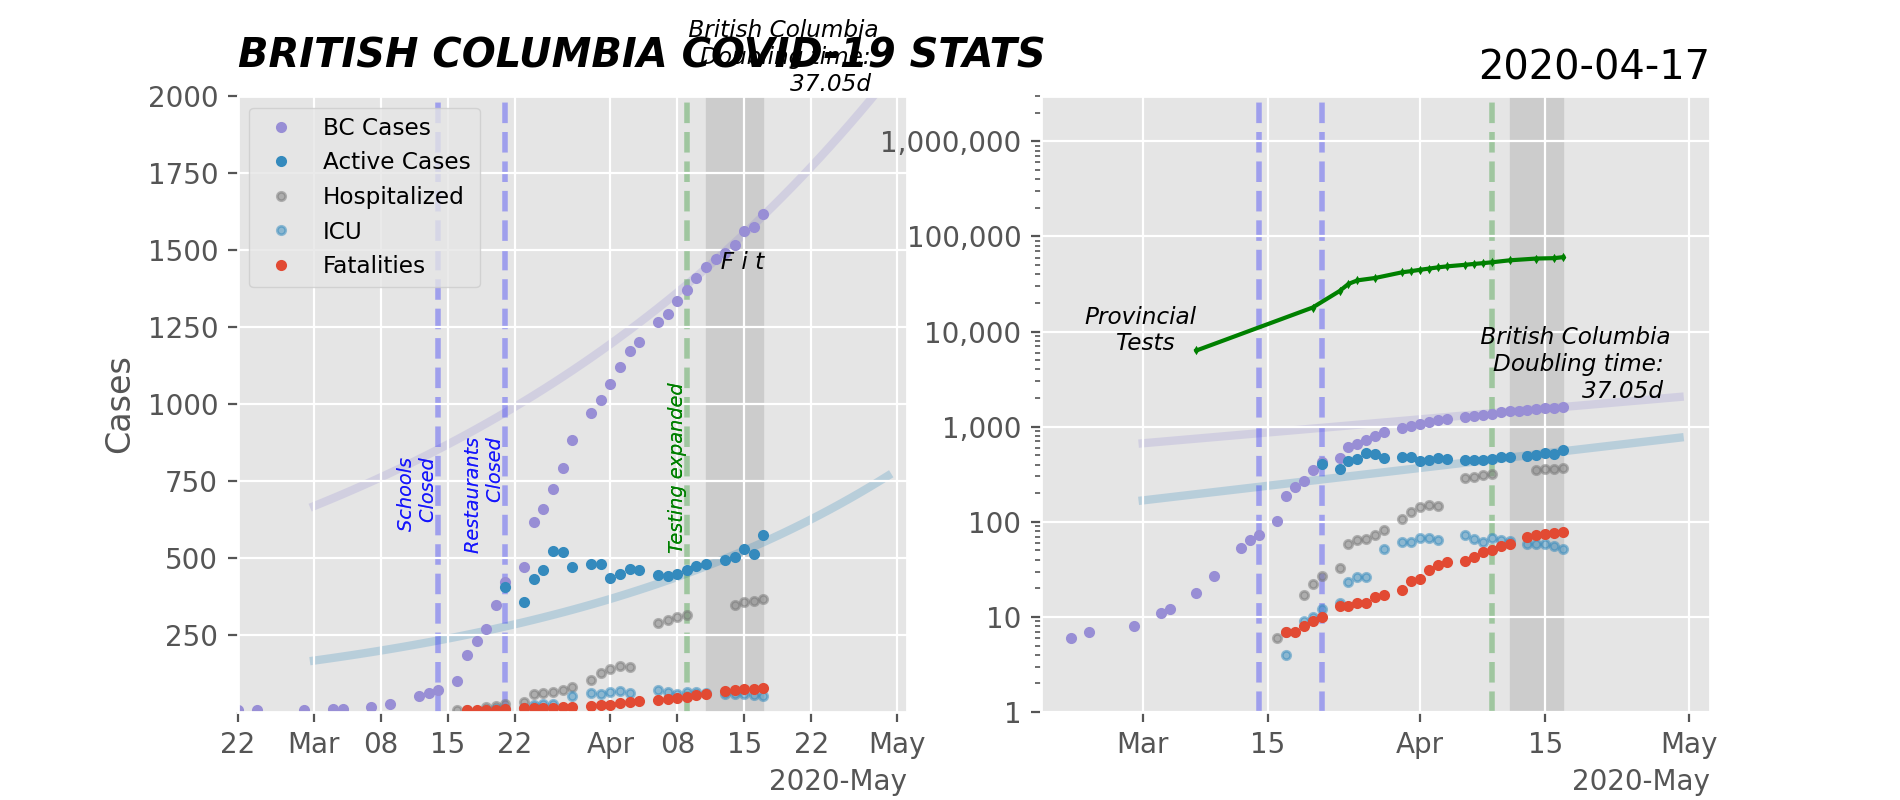

[33 34 35 36 37 38 39]
[[ 7.73129383e-07 -2.31938815e-06]
 [-2.31938815e-06  1.00506820e-05]]
51.05757254020632
56.094128367534545
[18 19 20 21 22 23]
[[ 4.52513247e-05 -1.50837749e-04]
 [-1.50837749e-04  6.78769871e-04]]
31.194086134995143
53.75321779335796
[33 34 35 36 37 38 39]
[[ 7.73129383e-07 -2.31938815e-06]
 [-2.31938815e-06  1.00506820e-05]]
51.05757254020632
56.094128367534545
[18 19 20 21 22 23]
[[ 4.52513247e-05 -1.50837749e-04]
 [-1.50837749e-04  6.78769871e-04]]
31.194086134995143
53.75321779335796


/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
/Users/jklymak/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: constrained_layout

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(9.5, 4), constrained_layout=True)

cCases = 'C2'
cActive = 'C1'
cHosp = 'C3'
cFat = 'C0'
cIcu = 'C1'

for nn in range(2):
    ax = axs[nn]
    
    ax.semilogy(df.Date, df.Cases, '.', label='BC Cases', color=cCases)
    ax.semilogy(df.Date, df.active, '.', label='Active Cases', color=cActive)

   
    good = np.where(np.isfinite(df.Tests))[0]
    ax.semilogy(df.Date[good], df.Tests[good], 'd-', markersize=1, color='g')
    ax.text(df.Date[good[0]],df.Tests[good[0]], 'Provincial\nTests   ', fontsize='small', fontstyle='italic', ha='right')

    ax.set_ylim(1, 400)
    
    ax.plot(df.Date, df.Hospitalized , '.', zorder=1, color=cHosp, label='Hospitalized', alpha=0.5)
    ax.plot(df.Date, df.ICU, '.', zorder=1, color=cIcu, label='ICU', alpha=0.5)
    ax.semilogy(df.Date, df.Deaths, '.', label='Fatalities', color=cFat)

    # total cases fit:
    tau, cases0, doubletime, t0, taulo, tauhi = fitgrowth(df.yday.values, df.Cases.values, ntofit=7)    
    dd = np.arange('2020-03', '2020-05', dtype='datetime64[D]')
    ddy = (dd-np.datetime64('2020-01-01')).astype('float')
    possiblecases = cases0*np.exp((ddy-t0)/tau)
    possiblecases = np.clip(possiblecases, 0, 5e6)    
    ax.plot(dd, possiblecases, zorder=0, linewidth=3, alpha=0.25, color=cCases)
    # label
    ind = np.where(dd > np.datetime64('2020-04-28'))[0][0]
    tt = ax.text(dd[ind], possiblecases[ind], f' British Columbia\nDoubling time: \n{np.log(2) * tau:1.2f}d ', 
            ha='right', fontsize='small', fontstyle='italic')
    tt.set_in_layout(False)

    # active cases fit:
    ddf = df.dropna(subset=['active'])
    tauA, cases0A, doubletimeA, t0A, taulo, tauhi = fitgrowth(ddf.yday.values, ddf.active.values, ntofit=7)    

    possiblecases = cases0A*np.exp((ddy-t0A)/tauA)
    possiblecases = np.clip(possiblecases, 0, 5e6)    
    ax.plot(dd, possiblecases, zorder=0, linewidth=3, alpha=0.25, color=cActive)
    # label
    if 0:
        ind = np.where(dd > np.datetime64('2020-04-28'))[0][0]
        tt = ax.text(dd[ind], possiblecases[ind], f' Doubling time: \n{np.log(2) * tauA:1.2f}d ', 
                ha='right', fontsize='small', fontstyle='italic')
        tt.set_in_layout(False)
    
    
    
    if nn == 0:
        ax.set_ylim(1, 2000)
        ax.set_yscale('linear')    
        ax.legend(loc=2, fontsize='small')
    else:
        ax.set_yscale('log')
        ax.set_ylim(1, 3e6)
    ax.axvline(np.datetime64('2020-03-14'), lw=2, color='b', linestyle='--', zorder=0, alpha=0.3)
    ax.axvline(np.datetime64('2020-03-21'), lw=2, color='b', linestyle='--', zorder=0, alpha=0.3)

    ax.axvline(np.datetime64('2020-04-09'), lw=2, color='g', linestyle='--', zorder=0, alpha=0.3)


    if nn==0:
        axs[0].text(np.datetime64('2020-03-14'),600, 'Schools \nClosed ', rotation=90, fontsize='x-small', alpha=0.7, color='b', ha='right', fontstyle='italic')
        axs[0].text(np.datetime64('2020-03-21'),530, 'Restaurants \nClosed ', rotation=90, fontsize='x-small', 
                    alpha=0.7, color='b', ha='right',fontstyle='italic')
        axs[0].text(np.datetime64('2020-04-09'), 530, 'Testing expanded', rotation=90, fontsize='x-small', 
                    color='g', ha='right',fontstyle='italic')



    ax.axvspan(df.Date.values[-1]-np.timedelta64(6, 'D'), df.Date.values[-1], color='0.8', zorder=-1)
axs[0].text(df.Date.values[-1]-np.timedelta64(6, 'D'), 1440, '  F i t', rotation=0, fontsize='small', fontstyle='italic')
axs[0].set_ylabel('Cases')
tt = axs[0].set_title(f'BRITISH COLUMBIA COVID-19 STATS ', loc='left', y=1.02, fontweight='bold', fontstyle='oblique')
tt.set_in_layout(False)

axs[1].set_title(str(df.Date.values[-1])[:10], loc='right')
axs[0].set_xlim([df.Date[0], df.Date.values[-1]+np.timedelta64(15, 'D')] )




ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
#axs[1].yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
# axs[1].set_ylabel('Cases')

savefigs(fig, 'Cases')
#fig.savefig('Cases.pdf')
#fig.savefig('Cases.png', dpi=200)

<IPython.core.display.Javascript object>


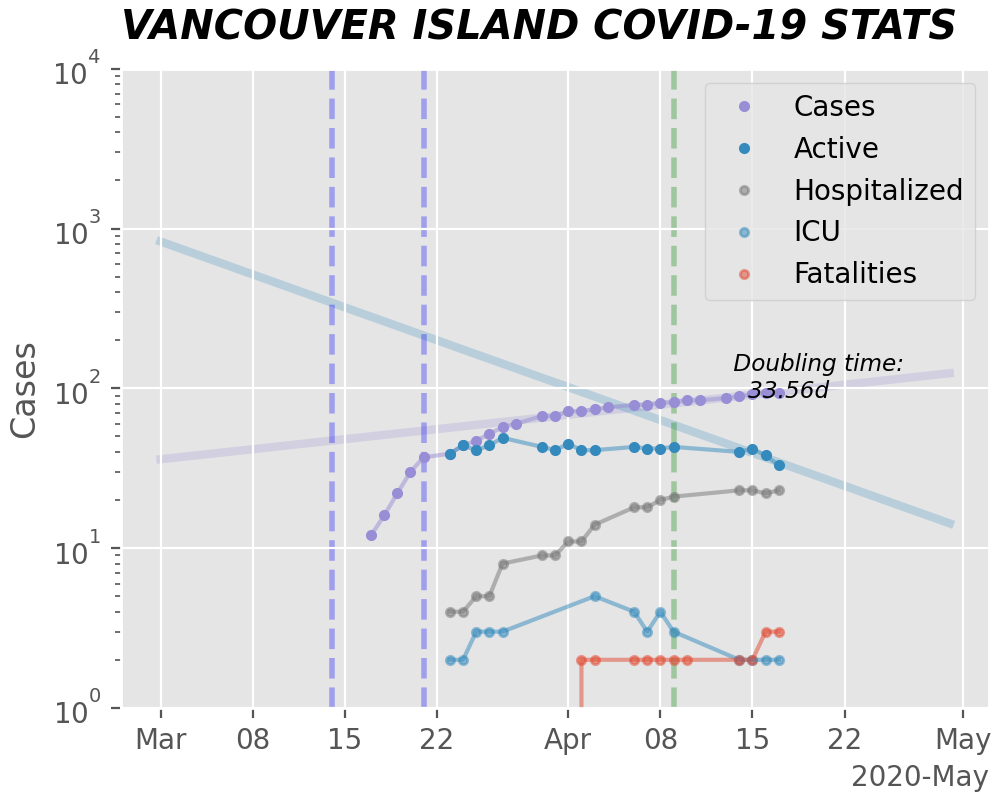

[22 23 24 25 26 27]
[[ 3.62599011e-06 -1.20866337e-05]
 [-1.20866337e-05  5.43898516e-05]]
44.324368463235274
53.3260906699686
[14 15 16 17]
[[ 0.00095944 -0.00143916]
 [-0.00143916  0.00335805]]
-27.21455394454713
-10.132247857658069


In [67]:
# VI
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)

dfd = df.dropna(subset=['Vancouver Island'])
ax.semilogy(dfd.Date, dfd['Vancouver Island'], '-', color=cCases, alpha=0.5)
ax.semilogy(dfd.Date, dfd['Vancouver Island'], '.', label='Cases', color=cCases)


df['VIActive'] = df['Vancouver Island'] - df['VI Recovered'] -df['VI Deaths']
dfd = df.dropna(subset=['VIActive'])
ax.semilogy(dfd.Date, dfd['VIActive'] , '-', color=cActive, alpha=0.5)
ax.semilogy(dfd.Date, dfd['VIActive'] , '.', label='Active', color=cActive)

dfd = df.dropna(subset=['VI Hosp'])
ax.semilogy(dfd.Date, dfd['VI Hosp'] , '-', color=cHosp, alpha=0.5)
ax.plot(df.Date, df['VI Hosp'] , '.', zorder=1, color=cHosp, label='Hospitalized', alpha=0.5)


dfd = df.dropna(subset=['VI ICU'])
ax.semilogy(dfd.Date, dfd['VI ICU'] , '-', color=cIcu, alpha=0.5)
ax.plot(df.Date, df['VI ICU'] , '.', zorder=1, color=cIcu, label='ICU', alpha=0.5)

dfd = df.dropna(subset=['VI Deaths'])
ax.semilogy(dfd.Date, dfd['VI Deaths'] , '-', color=cFat, alpha=0.5)
ax.plot(df.Date, df['VI Deaths'] , '.', zorder=1, color=cFat, label='Fatalities', alpha=0.5)

        
tauVI, cases0VI, doubletimeVI, t0, taulo, tauhi = fitgrowth(df.yday.values, df['Vancouver Island'].values, ntofit=7)
fitcases = cases0VI*np.exp((ddy-t0)/tauVI)
fitcases = np.clip(fitcases, 0, 870297)
ax.plot(dd, fitcases, zorder=0, linewidth=3, alpha=0.25, color=cCases)
ind = np.where(dd>np.datetime64('2020-04-12'))[0][0]
ax.text(dd[ind], fitcases[ind], f' Doubling time: \n   {np.log(2) * tauVI:1.2f}d ', 
   ha='left', fontsize='small', fontstyle='italic')


ddf = df.dropna(subset=['VIActive'])
tauVI, cases0VI, doubletimeVI, t0, taulo, tauhi = fitgrowth(ddf.yday.values, ddf['VIActive'].values, ntofit=7)
fitcases = cases0VI*np.exp((ddy-t0)/tauVI)
fitcases = np.clip(fitcases, 0, 870297)
ax.plot(dd, fitcases, zorder=0, linewidth=3, alpha=0.25, color=cActive)
if 0:
    ind = np.where(dd>np.datetime64('2020-04-22'))[0][0]
    ax.text(dd[ind], fitcases[ind], f' Doubling time: \n   {np.log(2) * tauVI:1.2f}d ', 
           ha='left', fontsize='small', fontstyle='italic')






# lines
ax.axvline(np.datetime64('2020-03-14'), lw=2, color='b', linestyle='--', zorder=0, alpha=0.3)
ax.axvline(np.datetime64('2020-03-21'), lw=2, color='b', linestyle='--', zorder=0, alpha=0.3)

ax.axvline(np.datetime64('2020-04-09'), lw=2, color='g', linestyle='--', zorder=0, alpha=0.3)


axs[0].text(np.datetime64('2020-03-14'),600, 'Schools \nClosed ', rotation=90, fontsize='x-small', alpha=0.7, color='b', ha='right', fontstyle='italic')
axs[0].text(np.datetime64('2020-03-21'),530, 'Restaurants \nClosed ', rotation=90, fontsize='x-small', 
            alpha=0.7, color='b', ha='right',fontstyle='italic')
axs[0].text(np.datetime64('2020-04-09'), 530, 'Testing expanded', rotation=90, fontsize='x-small', 
            color='g', ha='right',fontstyle='italic')
        



ax.legend()

ax.set_ylim([1, 1e4])
ax.axhline(807297)
tt = ax.set_title(f'VANCOUVER ISLAND COVID-19 STATS ', loc='left', y=1.02, fontweight='bold', fontstyle='oblique')
ax.set_ylabel('Cases')
savefigs(fig, 'VancouverIsland')


## Current cases

<IPython.core.display.Javascript object>


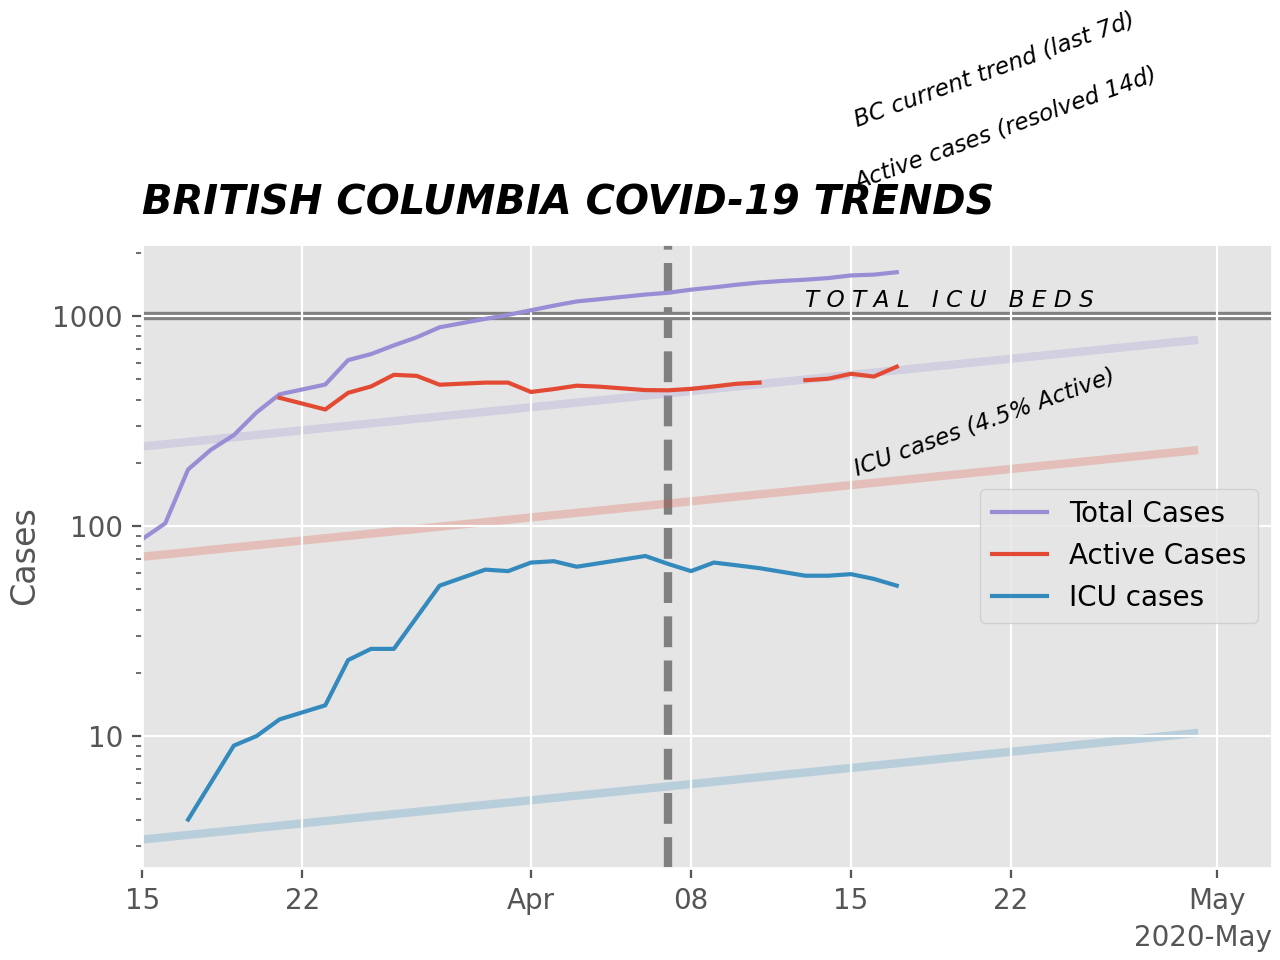

In [68]:
fig, ax = plt.subplots(constrained_layout=True)
currentcases = 0*possiblecases
currentcases[14:] = possiblecases[14:] - possiblecases[:-14]

ax.semilogy(df.Date, df.Cases, color='C2', label='Total Cases')

ax.semilogy(df.Date, df.Cases-df.Recovered-df.Deaths, label='Active Cases')


good = np.where(np.isfinite(df.ICU))[0]
ax.semilogy(df.Date.values[good], df.ICU.values[good], label='ICU cases')


ax.semilogy(dd, possiblecases, zorder=0, linewidth=3, alpha=0.25, color='C2')

ax.semilogy(dd[14:], currentcases[14:], zorder=0, linewidth=3, alpha=0.25, color='C0')

ax.semilogy(dd[14:], currentcases[14:]*0.045, zorder=0, linewidth=3, alpha=0.25, color='C1', )

ax.axhline(1000, linewidth=3, color='0.5', zorder=-3)
ax.text(np.datetime64('2020-04-13'), 1100, 'T O T A L   I C U   B E D S', fontsize='small', fontstyle='italic')

ax.legend()
ax.set_xlim(left=np.datetime64('2020-03-15'))
ax.set_ylabel('Cases')
ax.axvline(np.datetime64('2020-03-28')+np.timedelta64(10, 'D'), linewidth=3, color='0.5', zorder=-3, linestyle='--')


ax.text(np.datetime64('2020-04-15'), 8e3, 'BC current trend (last 7d)', rotation=20, fontsize='small', fontstyle='italic')

ax.text(np.datetime64('2020-04-15'), 4e3, 'Active cases (resolved 14d)', rotation=20, fontsize='small', fontstyle='italic')

ax.text(np.datetime64('2020-04-15'), 1.75e2, 'ICU cases (4.5% Active)', rotation=20, fontsize='small', fontstyle='italic')

ax.set_title(f'BRITISH COLUMBIA COVID-19 TRENDS', loc='left', y=1.02, fontweight='bold', fontstyle='oblique')

ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())



fig.savefig('covidtrends19trends.png', dpi=200)

fig.savefig('covidtrends19trends.pdf')





$ c = a\ e^{\frac{t-t_0}{\tau}}$ 

$log(c) = log(a) + (t-t_0)/\tau$

$exp((t-t0)/tau) = 2$
$t-t0 = np.log(2) * tau$


## Test rate

<IPython.core.display.Javascript object>


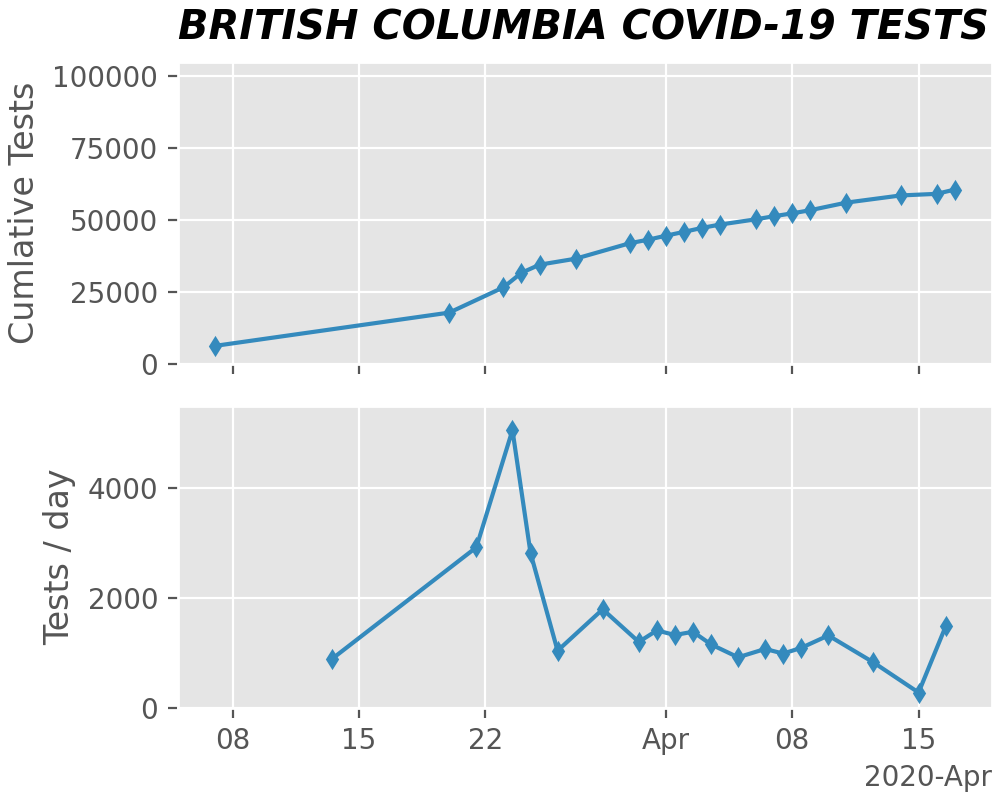

In [69]:
ddf = df.dropna(subset=['Tests'])
yday0 = ddf['yday'].values
tests = ddf['Tests'].values
dy = np.diff(yday0)
dt = np.diff(tests)
yday = yday0[:-1] + dy / 2
date = ddf['Date'][:-1].values + (dy / 2 * 24).astype('timedelta64[h]')

rate = dt / dy

fig, axs = plt.subplots(2, 1, figsize=(5, 4), sharex=True, constrained_layout=True)

axs[0].plot(ddf['Date'], ddf['Tests'], color='C1')
axs[0].plot(ddf['Date'], ddf['Tests'], 'd',color='C1', markersize=4)

axs[0].set_ylabel('Cumlative Tests')
axs[0].set_ylim(0, 105000)

axs[1].plot(date, rate, color='C1')

axs[1].plot(date, rate, 'd', color='C1', markersize=4)
axs[1].set_ylabel('Tests / day')
axs[1].set_ylim([0, 5500])

axs[0].set_title(f'BRITISH COLUMBIA COVID-19 TESTS', loc='left', y=1.02, fontweight='bold', fontstyle='oblique')

savefigs(fig, 'TestingRate')


In [70]:
blogpost = f"""---
layout: post
title:  "Statistics {datestrreadable}"
date:   {thedatestr}
categories: daily statistics
---

Updated statistics from [BC-CDC](http://www.bccdc.ca/health-info/diseases-conditions/covid-19/case-counts-press-statements).

![Cases](/covid19BCStats/images/{thedatestr}-Cases.png){{: width="1140"}}

![Vancouver Island](/covid19BCStats/images/{thedatestr}-VancouverIsland.png){{: width="450"}}

![Testing numbers](/covid19BCStats/images/{thedatestr}-TestingRate.png){{: width="500"}}

"""
postfile = f"docs/_posts/{thedatestr}-stats.md"
if not os.path.exists(postfile):
    with open(postfile, "w") as f:
        f.write(blogpost)
else:
    print(postfile + ' already exists!  Not overwriting.')
os.system(f'atom docs/_posts/{thedatestr}-stats.md')
os.system('git add docs/_posts/*')
os.system('git add docs/images/*')

0

In [76]:
blogpost

'---\nlayout: post\ntitle:  "Statistics 09 April 2020"\ndate:   2020-04-09\ncategories: daily statistics\n---\n\nUpdated statistics from [BC-CDC](http://www.bccdc.ca/health-info/diseases-conditions/covid-19/case-counts-press-statements).\n\n![Cases](/covid19BCStats/images/2020-04-09-Cases.png){: width="1140"}\n\n![Vancouver Island](/covid19BCStats/images/2020-04-09-VancouverIsland.png){: width="450"}\n\n![Testing numbers](/covid19BCStats/images/2020-04-09-TestingRate.png){: width="500"}\n\n'